**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [145]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors):
        self.n_neighbours = n_neighbors

    def fit(self, X, y):
        self.X = np.float64(X)
        self.classes, self.y = np.unique(y, return_inverse=True)

    def euk_distance(self, vec):
        return np.sqrt((((self.X - vec)) ** 2).sum(axis=1))

    def predict_proba(self, X):
        dist = np.apply_along_axis(self.euk_distance, 1, np.float64(X)).T
        ind = np.argsort(dist, axis=0)[:self.n_neighbours, :]
        classes_here = self.classes[self.y[ind]]
        counts = np.sum(classes_here.T.reshape(
            (classes_here.shape[1], 1, classes_here.shape[0]))
                        == self.classes.reshape(
                            (1, self.classes.shape[0], 1)), axis=2)
        return counts / self.n_neighbours

    def predict(self, X):
        proba = self.predict_proba(X)
        y_pred = self.classes[np.argsort(proba, axis=1)[:, -1:]]
        return y_pred.ravel()

    def score(self, X, y):
        y_pred = self.predict(X)
        diff = np.count_nonzero(y - y_pred)
        return 1 - diff / y.shape[0]

# 

**IRIS**

In [133]:
iris = datasets.load_iris()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

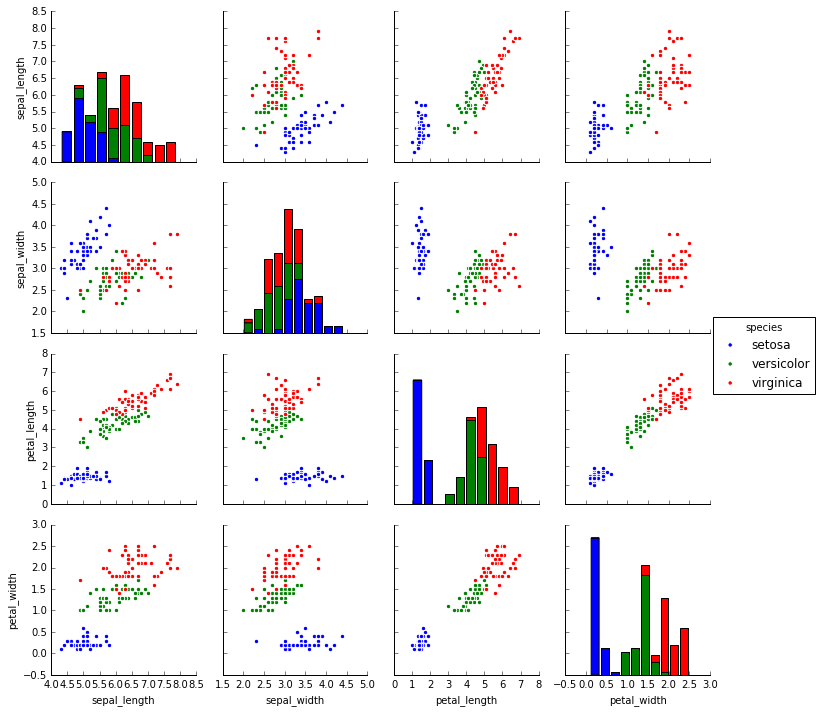

In [131]:
iris_ = sns.load_dataset("iris")
g = sns.pairplot(iris_, hue="species")

In [135]:
clf = KNeighborsClassifier(n_neighbors=3)
my_clf = MyKNeighborsClassifier(n_neighbors=3)

In [136]:
%time clf.fit(X_train, y_train)

CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 1.57 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [137]:
%time my_clf.fit(X_train, y_train)

CPU times: user 296 µs, sys: 25 µs, total: 321 µs
Wall time: 341 µs


In [138]:
%time clf.predict(X_test)

CPU times: user 1.98 ms, sys: 172 µs, total: 2.16 ms
Wall time: 1.95 ms


array([0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2])

In [139]:
%time my_clf.predict(X_test)

CPU times: user 1.15 ms, sys: 3.76 ms, total: 4.91 ms
Wall time: 3.24 ms


array([0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2])

In [140]:
%time clf.predict_proba(X_test)

CPU times: user 4.07 ms, sys: 6 µs, total: 4.08 ms
Wall time: 3.07 ms


array([[1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [142]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.93 ms, sys: 79 µs, total: 5.01 ms
Wall time: 7.87 ms


array([[1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [143]:
clf.score(X_test, y_test)

1.0

In [144]:
my_clf.score(X_test, y_test)

1.0

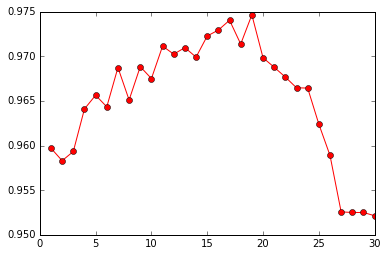

In [128]:
# Задание 3
# из графика - оптимальное значение n_neighbors примерно равно 17
num_n = 30
num_av = 2000
scm = np.zeros(num_n)
sc = np.zeros(num_av)
for n in range(1, num_n + 1):
    for i in range(num_av):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        sc[i] = my_clf.score(X_test, y_test)
    scm[n - 1] = sc.mean()
plt.plot(range(1, num_n + 1), scm, 'ro-')
plt.show()

**MNIST**

In [65]:
mnist = fetch_mldata('MNIST original')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.001, stratify=mnist.target)

In [67]:
clf = KNeighborsClassifier(n_neighbors=5)

In [68]:
my_clf = MyKNeighborsClassifier(n_neighbors=5)

In [69]:
%time clf.fit(X_train, y_train)

CPU times: user 2min 47s, sys: 1.57 s, total: 2min 49s
Wall time: 2min 47s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
%time my_clf.fit(X_train, y_train)

CPU times: user 146 ms, sys: 277 ms, total: 422 ms
Wall time: 422 ms


In [71]:
%time clf.predict(X_test)

CPU times: user 23.6 s, sys: 2.56 ms, total: 23.6 s
Wall time: 23.6 s


array([9., 9., 3., 6., 4., 1., 3., 6., 0., 0., 7., 3., 8., 1., 8., 3., 1.,
       1., 6., 1., 8., 5., 9., 2., 9., 2., 2., 4., 0., 7., 5., 4., 6., 8.,
       7., 4., 8., 8., 5., 1., 6., 5., 2., 6., 3., 3., 7., 7., 1., 0., 5.,
       6., 0., 9., 4., 3., 5., 2., 0., 0., 2., 7., 9., 1., 7., 2., 4., 8.,
       4., 4.])

In [72]:
%time my_clf.predict(X_test)

CPU times: user 29.4 s, sys: 22 s, total: 51.4 s
Wall time: 51.7 s


array([9., 9., 3., 6., 4., 1., 3., 6., 0., 0., 7., 3., 8., 1., 8., 3., 1.,
       1., 6., 1., 8., 5., 9., 2., 9., 2., 2., 4., 0., 7., 5., 4., 6., 8.,
       7., 4., 8., 8., 5., 1., 6., 5., 2., 6., 3., 3., 7., 7., 1., 0., 5.,
       6., 0., 9., 4., 3., 5., 2., 0., 0., 2., 7., 9., 1., 7., 2., 4., 8.,
       4., 4.])

In [73]:
%time clf.predict_proba(X_test)

CPU times: user 23.7 s, sys: 0 ns, total: 23.7 s
Wall time: 23.7 s


array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0.2, 0. , 0.2, 0. , 0. , 0.2, 0. , 0.4],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0.2, 0. , 0. , 0.4, 0. , 0.2, 0. , 0. , 0.2, 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

In [74]:
%time my_clf.predict_proba(X_test)

CPU times: user 29.6 s, sys: 22 s, total: 51.6 s
Wall time: 51.6 s


array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0.2, 0. , 0.2, 0. , 0. , 0.2, 0. , 0.4],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0.2, 0. , 0. , 0.4, 0. , 0.2, 0. , 0. , 0.2, 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

In [75]:
clf.score(X_test, y_test)

0.9571428571428572

In [76]:
my_clf.score(X_test, y_test)

0.9571428571428572

Задание 5

In [ ]:
# seaborn - красивая визуализция данных, много различных вариантов представления;
#           может быть крайне полезно, когда много размерностей
# matplotlib - более или менее банальное построение графиков; похоже на matlab
# train_test_split - разбивка всех наших известных данных на подмножества: одно - для обучения, 
#                     другое - для проверки, насколько хорошо или плохо получилось
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - поззволяет удобно объединить 
#                    несколько действий (например, преобразования данных и обучение модели)
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормировка так, чтобы 
#                    среднее стало равно 0, а стандартное отклонение 1
# ClassifierMixin - самый базовый класс для классификаторов, методы __init__ и score
# NeighborsBase - базовый класс для knn (некоторые приватные вспомогательные методы)
# KNeighborsMixin - тоже базовый класс (содержит мметод поиска ближайших соседей)
# SupervisedIntegerMixin - еще один базовый класс (содержит метод fit)